In [8]:
import pandas as pd
import geopandas as gpd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# connect
con = sqlite3.connect('berdo_better.db 2')
con

query_1 = """select avg("Site EUI (kBTU/sf)"), year
from (
select *
from berdo_better_full
where "Site EUI (kBTU/sf)" between 0 and 200 and "Site EUI (kBTU/sf)" is not null)
group by year;"""

d = pd.read_sql_query(query_1, con)
df = pd.DataFrame(d)



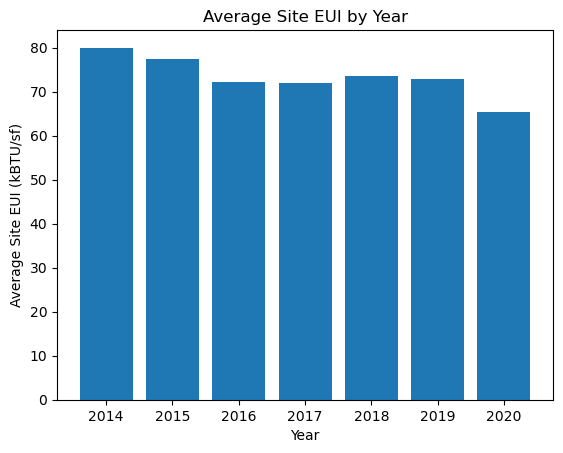

In [10]:
df['Year'] = df['Year'].astype(int)

# Sort the data by year in ascending order
df = df.sort_values('Year')

# Create the bar chart
plt.bar(df['Year'], df['avg("Site EUI (kBTU/sf)")'])

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Average Site EUI (kBTU/sf)')
plt.title('Average Site EUI by Year')

# Show the chart
plt.show()